In [80]:
import pandas as pd
treino = pd.read_csv('train_3_1.csv')
teste = pd.read_csv('test_3_1.csv')

In [81]:
treino.shape

(1460, 90)

In [82]:
treino.dtypes.value_counts()

int64      37
object     35
float64    18
dtype: int64

In [83]:
cols_nr = treino.columns[treino.dtypes != 'object']
cols_nr[cols_nr != 'SalePrice']

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'MSZoning_C (all).1', 'MSZoning_FV.1', 'MSZoning_RH.1',
       'MSZoning_RL.1', 'MSZoning_RM.1', 'GarageType_-1', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageType_infrequent_sklearn'],
      dtype='object')

In [84]:
treino = treino.loc[:,cols_nr]
treino.shape

(1460, 55)

In [85]:
teste = teste.loc[:,cols_nr[cols_nr != 'SalePrice']]
teste.shape

(1459, 54)

In [86]:
X = treino.drop('SalePrice',axis=1)
y = treino.SalePrice

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [89]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
reg_rl = LinearRegression().fit(X_train, y_train)

In [92]:
y_pred_rl = reg_rl.predict(X_test)

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
reg_rf = RandomForestRegressor(random_state=42)
parametros_rf = {
    'n_estimators': [100,200],
    'criterion': ['squared_error', 'poisson'],
    'max_depth': [10,20,30],
    'max_features': ['auto', 'sqrt']
}

Grid Search

In [95]:
from sklearn.model_selection import GridSearchCV


In [96]:
grid_search_rf = GridSearchCV(estimator=reg_rf,param_grid=parametros_rf,scoring='neg_mean_squared_error')
grid_search_rf = grid_search_rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Verificação dos melhor parâmetros
grid_search_rf.best_params_

{'criterion': 'poisson',
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [ ]:
# Melhor score
grid_search_rf.best_score_*(-1)

909213041.4595659

In [ ]:
y_pred_rf = reg_rf.predict(X_test)

In [ ]:
! pip install xgboost


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from xgboost import XGBRegressor

In [ ]:
reg_xgb = XGBRegressor(random_state=42)
parametros_xgb = {
    'learning_rate': [0.3, 0.03, 0.1],
    'max_depth': [10,20],
    'n_estimators': [100, 200],
    'colsample_bytree': [0.7, 1]
}

In [ ]:
grid_search_xgb = GridSearchCV(estimator=reg_xgb,param_grid=parametros_xgb,scoring='neg_mean_squared_error')
grid_search_xgb = grid_search_xgb.fit(X_train,y_train)

In [ ]:
grid_search_xgb.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 20,
 'n_estimators': 200}

In [ ]:
grid_search_xgb.best_score_*(-1)

993922422.9625816

In [ ]:
reg_rf_best = grid_search_rf.best_estimator_

In [ ]:
reg_xgb_best = grid_search_xgb.best_estimator_

Previsão no X_test

In [ ]:
y_pred_rf = reg_rf_best.predict(X_test)

In [ ]:
y_pred_xgb = reg_xgb_best.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

22157.115236191457
1539851963.9376073


In [ ]:
print(mean_absolute_error(y_test, y_pred_rf))
print(mean_squared_error(y_test, y_pred_rf))

17465.73686721992
1044019930.1714572


In [ ]:
print(mean_absolute_error(y_test, y_pred_xgb))
print(mean_squared_error(y_test, y_pred_xgb))

17699.215767634854
1107877907.8879383


In [ ]:
import matplotlib.pyplot as plt

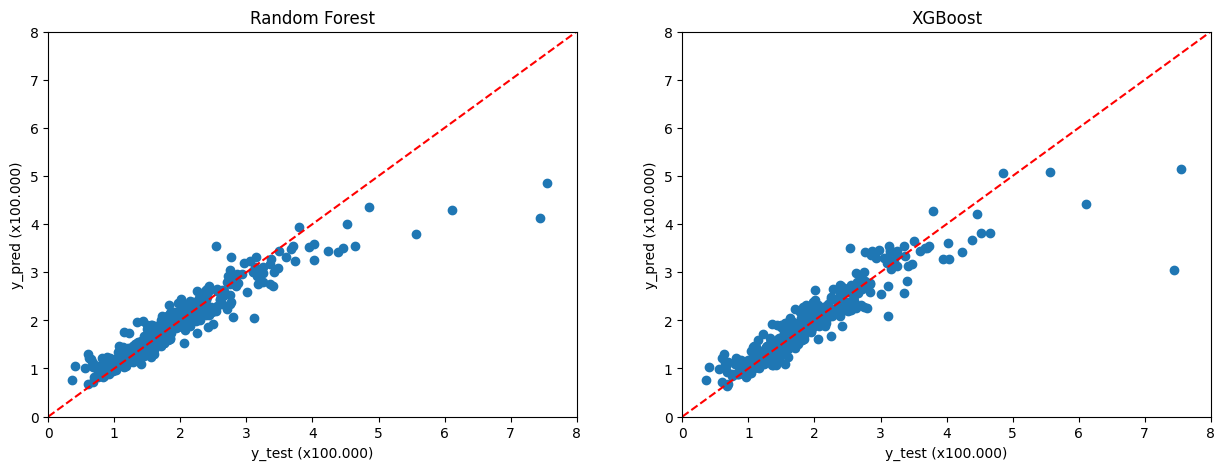

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rf/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_test/100000, y_pred_xgb/100000)
ax[1].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Random Forest')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('XGBoost')

plt.show()

In [ ]:
y_pred = reg_xgb_best.predict(teste)

In [ ]:
teste['SalePrice'] = y_pred

In [ ]:
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,128806.664062
1,1462,157091.265625
2,1463,183556.078125


In [ ]:
base_kaggle.to_csv('resultado5_1_xgb.csv',index=False)